In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data loading

In [63]:
district_data = pd.read_csv('../data/raw/district.csv', dtype='str')
district_data.head(2)

,district_id,name_chinese,name_english,city_id
0,00101,海淀区,HaiDianQu,001
1,00102,石景山区,ShiJingShanQu,001


In [64]:
# City id is 1 for Beijing
beijing_districts = district_data[district_data.city_id=='001']['district_id']
beijing_districts

0     00101
1     00102
2     00103
3     00104
4     00105
5     00106
6     00107
7     00108
8     00109
9     00110
10    00111
11    00112
12    00113
13    00114
14    00115
15    00116
Name: district_id, dtype: object

In [65]:
station_data = pd.read_csv('../data/raw/station.csv', dtype='str')

beijing_stations = station_data[station_data.district_id.isin(beijing_districts)]
beijing_stations

,station_id,name_chinese,name_english,latitude,longitude,district_id
0,001001,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101
1,001002,海淀北京植物园,HaiDianBeiJingZhiWuYuan,40.003950,116.205310,00101
2,001003,石景山古城,ShiJingShanGuCheng,39.914409,116.184239,00102
3,001004,丰台云岗,FengTaiYunGang,39.815128,116.171150,00103
4,001005,房山良乡,FangShanLiangXiang,39.742767,116.136045,00104
5,001006,海淀万柳,HaiDianWanLiu,39.987313,116.287451,00101
6,001007,朝阳奥体中心,ChaoYangAoTiZhongXin,39.982053,116.397400,00105
7,001008,西直门北大街,XiZhiMenBeiDaJie,39.954047,116.348991,00101
8,001009,西城万寿西宫,XiChengWanShouXiGong,39.878193,116.351974,00106
9,001010,永定门内大街,YongDingMenNeiDaJie,39.876184,116.394009,00103


In [66]:
aq_data = pd.read_csv('../data/raw/airquality.csv.gz', dtype='str')
aq_data.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9


In [67]:
beijing_aq = aq_data[aq_data.station_id.isin(beijing_stations.station_id)]
beijing_aq.describe()

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
count,278023,278023,273553,173243,264854,267720,266657,267283
unique,36,8571,670,5600,2353,161,3141,1678
top,001003,2014-07-31 03:00:00,3,5,2,0.3,2,2
freq,8298,36,4650,1610,4731,22178,31387,49551


In [68]:
met_data = pd.read_csv('../data/raw/meteorology.csv.gz', dtype='str')
met_data.head(2)

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,001,2014-05-01 02:00:00,NaN,18,755.9,71,2,23
1,001,2014-05-01 05:00:00,NaN,16.8,755.8,78,1,13


In [69]:
beijing_met = met_data[met_data.id.isin(beijing_districts)]
beijing_met

,id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
6189,00101,2014-05-01 00:00:00,0,20,1004,56,7.92,13
6190,00101,2014-05-01 01:00:00,0,18,1004,64,7.56,13
6191,00101,2014-05-01 02:00:00,0,18,1004,70,5.76,13
6192,00101,2014-05-01 03:00:00,0,17,1004,74,6.12,13
6193,00101,2014-05-01 04:00:00,0,17,1004,75,4.68,1
...,...,...,...,...,...,...,...,...
116862,00116,2015-04-30 18:00:00,4,23.5,953,46,1.5,13
116863,00116,2015-04-30 19:00:00,4,22.6,953,49,1.8,13
116864,00116,2015-04-30 20:00:00,4,22,954,51,2.7,13
116865,00116,2015-04-30 22:00:00,4,21.3,954,54,1.6,13


### Combining

In [70]:
beijing_aq_with_dist = pd.merge(beijing_aq, beijing_stations, )
beijing_aq_with_dist.shape, beijing_aq.shape

((278023, 13), (278023, 8))

In [71]:
beijing_aq_with_dist.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,name_chinese,name_english,latitude,longitude,district_id
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101


In [72]:
beijing_met = beijing_met.rename(columns={'id': 'district_id'})
beijing_met.head(2)

,district_id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
6189,00101,2014-05-01 00:00:00,0,20,1004,56,7.92,13
6190,00101,2014-05-01 01:00:00,0,18,1004,64,7.56,13


In [73]:
beijing_aq_plus_met = pd.merge(beijing_aq_with_dist, beijing_met, on=['district_id', 'time'], how='left')
beijing_aq_with_dist.shape, beijing_met.shape, beijing_aq_plus_met.shape

((278023, 13), (110678, 8), (278023, 19))

In [74]:
beijing_aq_plus_met.head(2)

,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,name_chinese,name_english,latitude,longitude,district_id,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,001001,2014-05-01 00:00:00,138,159.4,56.3,0.9,50.8,17.2,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101,0,20,1004,56,7.92,13
1,001001,2014-05-01 01:00:00,124,163.9,38.7,0.9,51.1,17.9,海淀北部新区,HaiDianBeiBuXinQu,40.090679,116.173553,00101,0,18,1004,64,7.56,13


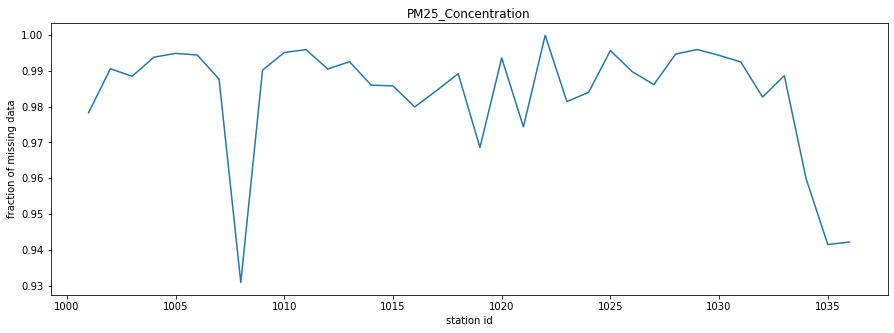

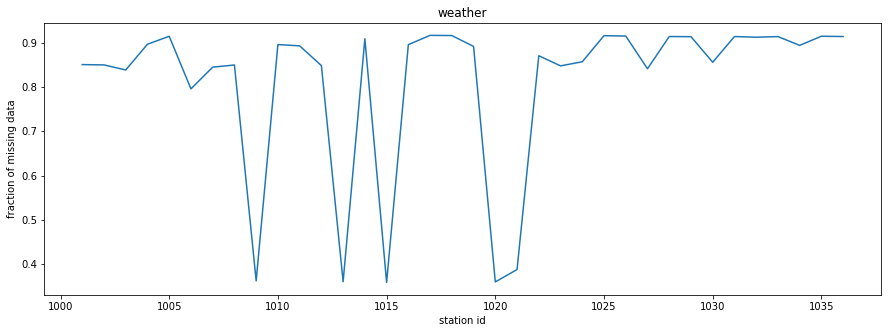

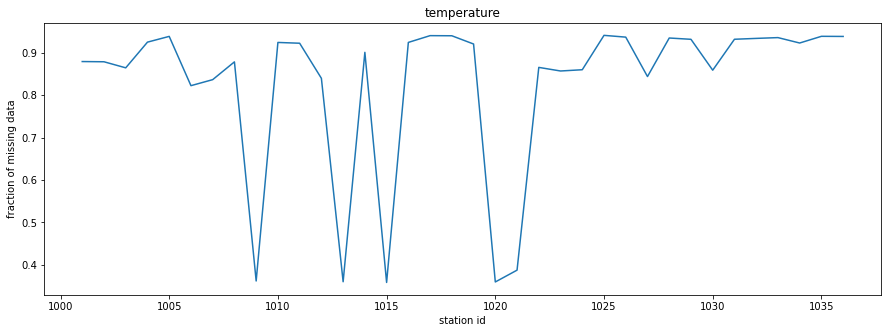

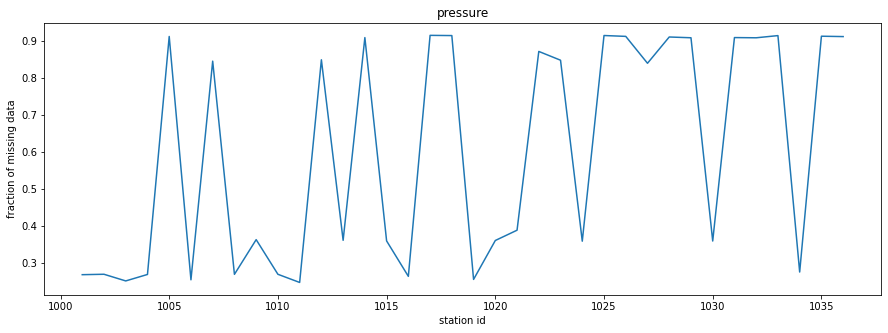

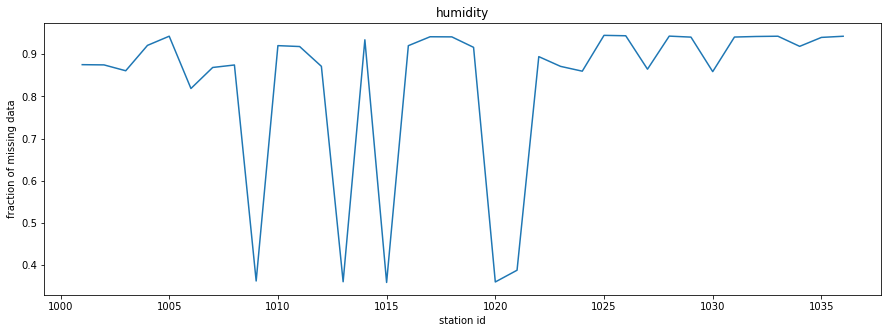

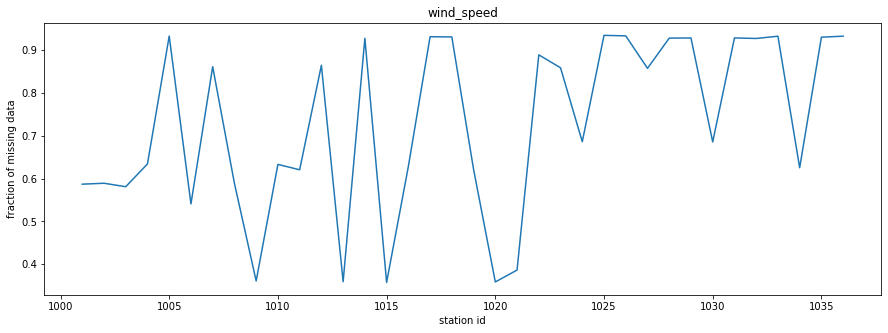

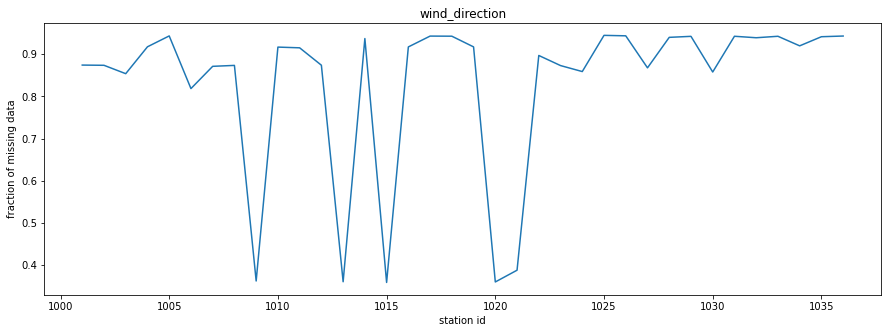

In [77]:
vars = ['PM25_Concentration', 'weather', 'temperature', 
        'pressure', 'humidity', 'wind_speed', 'wind_direction']
for var in vars:    
    values = []
    for station in beijing_stations.station_id:
        tmp_df = beijing_aq_plus_met[beijing_aq_plus_met.station_id==station]
        tmp_df['time'] = pd.to_datetime(tmp_df['time']).values
    #     print(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
        values.append(tmp_df[var].dropna().shape[0]/tmp_df[var].shape[0])
    #     break
    plt.figure(figsize=(15,5));
    plt.plot(beijing_stations.station_id.values.astype(int), values);
    plt.title(var);
    plt.ylabel('fraction of missing data')
    plt.xlabel('station id')